In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)



In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [5]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [14]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:60000], X[:10000], X[60000:], y[:60000], y[:10000], y[60000:]

In [7]:
# Multilabel classification
from sklearn.neighbors import KNeighborsClassifier

(None, '5')

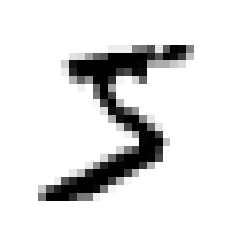

In [10]:
plot_digit(X_train[0]), y[0]

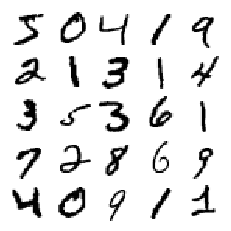

In [11]:
plot_digits(X_train[:25], images_per_row=5)

In [ ]:
# Grid Search for KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'weights': ('uniform','distance'), 'n_neighbors':[3, 5, 7, 9, 11, 13]}

knn_clf = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_clf, parameters, cv=5, verbose=3, return_train_score=True)


knn_grid_search.fit(X_val, y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
